# Part 1: SQL

### Question 1
For each of the cities 'Qarth' and 'Meereen', calculate 90th percentile difference between Actual and Predicted ETA for all completed trips within the last 30 days.

**Ans:** Assume actual_eta, predicted_eta are UNIX epoch.

### Question 2
A signup is defined as an event labeled ‘sign_up_success’ within the events table. For each city (‘Qarth’ and ‘Meereen’) and each day of the week, determine the percentage of signups in the first week of 2016 that resulted in completed a trip within 168 hours of the sign up date.

# Part 2: Experiment and metrics design

### Question 1
Propose and define the primary success metric of the redesigned app. What are additional tracking metrics that will be important to monitor in addition to the success metric defined above?

**Ans: **

Primary metrics: 
* **Average time spent on the new app per day.** This demonstrates how engaged the partners are with the new app, including the driving and new sections. 

Secondary metrics:
* **Average time spent on the new features per day.** This demonstrates how engaged the partners are with the new sections, including earnings, rating, and communication platform.
* **Average daily earnings.** This indicates the partners' response to the added earning section. Drivers are more aware of the earnings and may work harder to earn more. A similar metrics is average number of trips completed per day.
* **Total communications with Uber per driver, including traditional help channels and new communication platform.** This is to see if partners are more enaged with Uber. Partners may find traditional help channels, such as emails, SMS or calls, inconvenient and were less involved. With the new communication platform, partners are more open to communicate. I'd like to track both changes. I'd expect to see an increase of the total communications with the new app and a decrease of help requests from traditional channels.  
* **Rating.** First I'd like to clarify what the rating refers to. If it refers to the rating given after each trip, it is useful for partner to be aware of and take actions(if the rating is low). However, if the rating refers to the total rating (averaged over most recent 500 trips), the rating have small change (if any) with a single trip. New drivers may benefit more than the old drivers as the former's rating is more affected by a single trip.

### Question 2
Outline a testing plan to evaluate if redesigned app performs better (according to the metrics you outlined). How would you balance the need to deliver quick results, with statistical rigor, and while still monitoring for risks?

**Ans:**
I will evaluate the new partner app using A/B testing.
* **Assumptions**
    * Old version apps don't have significant difference.
* **Success criteria (Effect size)** This is to be discussed with product manager and cross-functional groups. Below is what I proposed:
    * Average time spent on the new app per day: 10% increase
    * Average time spent on the new features per day: 5 minutes 
    * Average daily earnings: Increase
    * Total communications with Uber: Increase
    * Rating: No change or increase
* **Group assignment** 
    * Treatment: 10% parters are forced to update and use the new Uber Partner app.
        * 10% is chosen for two reasons:
            1. Network effect. Treated partners may talk about the new app and affect the partners in the control group. Assigning a large number of partners to the treatment group(i.e. 50%) may cause bias. 
            2. Risk control. Limit the treatment group size as part of the risk concern with the new app.
    * Control: 50% partners use the old(their current) Uber Partner app.  
* **Length of experiment**
    * Power analysis: Given effect size, power, significance level, and baseline, we can estimate the sample size that satisfies a certain statistical power. All the variables should be determined with cross-functional groups. With the estimated sample size, we can design the length of the experiment accordingly. 
    * Use the primary metrics as an example. Assume the statistical power and significance level to be 80% and 5%, respectively. Assume an effect size of 10%, i.e. if the 10% increase in time spent on the app is statistical significant, we call the new app a success. Given the distribution of the averaged time spent on the old app, we can estimate the sample size and thus the length of the experiment. 
    * We should avoid the experimental length being too short or too long. If too short, we don't have enough sample to reach desired statistical power. If too long, other factors may kick in and cause bias.
    * We should avoid peeking into the experiment. Even if we have to, we should avoid interfering it(stop early when seeing a statistical significance).

### Question 3
Explain how you would translate the results from the testing plan into a decision on whether to launch the new design or roll it back.

**Ans:** 
Along the experiment, we track all the metrics and their test statistics. An important parameter is the p value. If at the end of the experiment, 
* p value indicates a significant difference, including average time spent on the new app, average time spent on the new features, average daily earnings, total communication time. We should launch the new design.  
* p value indicates neutral effect for average time spent on the new app, while showing a significant difference in the others, such as communications. We may roll it back. But if the average earnings is shown to have a significant difference, we may consider launch it. This may require cross-functional group discussions to make the decision.
* p value indicates neutral effects for the average time spent on the new app, average time spent on the new features, average daily earnings. We should stop the experiments. 
* If app issues, such as crashes, were identified during the experiment, we should stop the experiment. 

# Part 3: Data analysis

### Question 1
Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the driver signups took a first trip?

** Ans**: Steps are briefed below:
1. Import data
2. Check missing values, duplicates
3. Check outliers
    * Vehicle year 
    * Time backwards issue
3. Explore univariate distribution 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix
%matplotlib inline

In [3]:
#import data
data = pd.read_excel('ds_challenge_v2_1_data (1) (5).xlsx')

In [4]:
data.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,2016-01-21,NaT,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03 00:00:00,Toyota,Corolla,2016.0,2016-02-03 00:00:00
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26 00:00:00,Hyundai,Sonata,2016.0,NaN


In [5]:
data.shape

(54681, 11)

In [6]:
#check duplicates
data.drop_duplicates().shape

(54681, 11)

In [7]:
#check missing values
data.isnull().sum()

id                          0
city_name                   0
signup_os                6857
signup_channel              0
signup_date                 0
bgc_date                21785
vehicle_added_date      41547
vehicle_make            41458
vehicle_model           41458
vehicle_year            41458
first_completed_date    48544
dtype: int64

In [8]:
#check numericals
data.describe()

,id,vehicle_year
count,54681.000000,13223.000000
mean,27341.000000,2010.568025
std,15785.189372,35.219184
min,1.000000,0.000000
25%,13671.000000,2008.000000
50%,27341.000000,2013.000000
75%,41011.000000,2015.000000
max,54681.000000,2017.000000


In [9]:
#vehicle year
data.vehicle_year.sort_values().head(10)

48128       0.0
49606       0.0
20017       0.0
44837       0.0
25649    1995.0
40733    1996.0
16363    1996.0
2719     1996.0
13553    1996.0
4549     1997.0
Name: vehicle_year, dtype: float64

Four vehicles have a year of zero. I will remove these 4 datapoints. 

In [10]:
#remove incorrect data points
data = data[data.vehicle_year != 0]

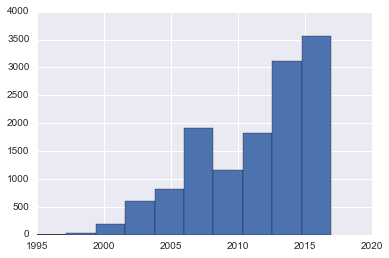

In [11]:
data.vehicle_year.hist()

Most vehicles are new models. Vehicles must be 15 model years old or newer to be eligible. Most signup vehicles satisfy this requirement. 

Let's check date and time.

In [12]:
#convert to time format
data['signup_date'] = pd.to_datetime(data.signup_date)
data['bgc_date'] = pd.to_datetime(data.bgc_date)
data['vehicle_added_date'] = pd.to_datetime(data.vehicle_added_date)
data['first_completed_date'] = pd.to_datetime(data.first_completed_date)

In [13]:
#time between signup and first trip
(data.first_completed_date - data.signup_date).describe()

count                       6137
mean     12 days 00:45:03.079680
std       7 days 17:30:26.639917
min              0 days 00:00:00
25%              6 days 00:00:00
50%             11 days 00:00:00
75%             17 days 00:00:00
max             30 days 00:00:00
dtype: object

The above description shows that there are driver that signed up and completed the first trip in the same day. This looks suspicious. I will take a closer look.

In [14]:
data['delay_siggnup_trip'] = (data.first_completed_date - data.signup_date)/np.timedelta64(1, 'D')
data.delay_siggnup_trip.sort_values().head(10)

41005    0.0
16901    0.0
33958    0.0
11909    0.0
40889    0.0
165      0.0
44366    0.0
53204    0.0
22121    0.0
16632    0.0
Name: delay_siggnup_trip, dtype: float64

In [15]:
data[data.index == 40889]

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,delay_siggnup_trip
40889,40890,Berton,mac,Referral,2016-01-25,2016-01-25,2016-01-25,Mazda,MAZDA3,2016.0,2016-01-25,0.0


These drivers completed everything in one day, including signup, background check, adding vehicle and taking first trip. I will keep them.

In [16]:
#time between signup and background check
(data.bgc_date - data.signup_date).describe()

count                      32893
mean     10 days 01:07:40.876174
std      10 days 12:28:45.071066
min              0 days 00:00:00
25%              2 days 00:00:00
50%              6 days 00:00:00
75%             15 days 00:00:00
max             69 days 00:00:00
dtype: object

In [17]:
#time between signup and vehicle added date
(data.vehicle_added_date - data.signup_date).describe()

count                      13130
mean     15 days 04:51:30.571210
std      14 days 01:31:38.477570
min            -5 days +00:00:00
25%              4 days 00:00:00
50%             11 days 00:00:00
75%             24 days 00:00:00
max             72 days 00:00:00
dtype: object

Drivers need to signup before adding vehicles. The negative time may be an outlier. I'll take a closer look.

In [18]:
#get days difference between signup and vehicle added
data['delay_siggnup_vehicleAdd'] = (data.vehicle_added_date - data.signup_date)/np.timedelta64(1, 'D')

In [19]:
#check the distribution
data.delay_siggnup_vehicleAdd.sort_values(ascending=True).head()

9268    -5.0
22260    0.0
2744     0.0
47846    0.0
16688    0.0
Name: delay_siggnup_vehicleAdd, dtype: float64

Only 1 data point shows vehicle is added before signing up. I will remove this data point.

In [20]:
#remove the outlier
data = data[~ (data.delay_siggnup_vehicleAdd < 0)]

In [21]:
#time between the first trip and background check
(data.first_completed_date - data.bgc_date).describe()

count                      6136
mean     8 days 16:46:32.698826
std      6 days 19:31:08.964680
min          -14 days +00:00:00
25%             3 days 00:00:00
50%             7 days 00:00:00
75%            13 days 00:00:00
max            30 days 00:00:00
dtype: object

Vehicles should complete the background check before any trip. So the negative values doesn't make sense. Let's take a closer look.

In [22]:
#time between the first trip and background check, vehicle added date
data['delay_vehicleAdd_trip'] = (data.first_completed_date - data.vehicle_added_date)/np.timedelta64(1, 'D')
data['delay_bgc_trip'] = (data.first_completed_date - data.bgc_date)/np.timedelta64(1, 'D')

In [23]:
#data.delay_bgc_trip.sort_values().head()
#example of the first trip occuring before the background check
data[data.index == 12668]

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,delay_siggnup_trip,delay_siggnup_vehicleAdd,delay_vehicleAdd_trip,delay_bgc_trip
12668,12669,Strark,NaN,Organic,2016-01-28,2016-03-08,2016-02-21,Scion,xB,2013.0,2016-02-23,26.0,24.0,2.0,-14.0


In [24]:
print data[data.delay_bgc_trip < 0].shape

(33, 15)


As seen above, 33 data show that the drivers took the first trip time even before the background check. This indicates either these drivers obey Uber's requirements of passing the screening before taking the trip, or these data are incorrect. We should communicate to the engineering team and find out the root cause. For now, I will remove the 33 points. Similarly, I will remove those having vehicle added before the first trip

In [25]:
#remove outliers
data = data[~ (data.delay_bgc_trip < 0)]
data = data[~(data.delay_vehicleAdd_trip < 0)]

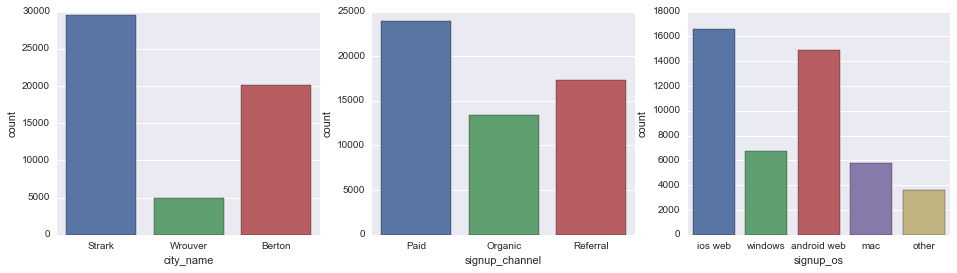

In [135]:
#distribution of signup city, channel, and system
fig, ax = plt.subplots(1, 3, figsize = (16, 4)) 
sns.countplot(data.city_name, ax=ax[0])
sns.countplot(data.signup_channel, ax=ax[1]) 
sns.countplot(data.signup_os, ax=ax[2])

Above plots show that:
1. City Strark has the most signups, followed by Berton and Wrouver.
2. Paid channel has the most signups, followed by referral and organic signups.
3. Most signups are completed via iOS web and Android web. 

After cleaning the data, I will calculate the fraction of signups that take the first trip.

In [26]:
#drivers that are converted
data['converted'] = data.first_completed_date.apply(lambda x: 0 if pd.isnull(x) else 1)

In [27]:
num_signup = data.shape[0]
num_converted = data[data.converted == 1].shape[0]
print "About %.f%% driver signups took a first trip." % (float(num_converted)/num_signup*100)
#float(num_converted)/num_signup

About 11% driver signups took a first trip.


### Question 2
Build a predictive model to help Uber determine whether or not a driver signup will start driving. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

**Ans**: I'd like to use random forest(RF) classification model to predict if a driver signup will start driving. The reasons include:
1. RF is robust.
2. RF handles non-linear distributions.
3. The data has unbalanced label. RF provides weighting option to balance the minority class.

Alternatives are Penalized Logistic Regression and SVM.

I'd like to validate in three ways.
1. Out-of-bag score in RF. As a third data are left out of bootstrap sample, they can be used to get a running unbiased estimate of the test set classification error.  
2. ROC and AUC. Since the label is highly unbalanced, a low test error is expected (predicting all cases in the majority class). ROC and AUC provides a different metric by examining how true positive rate and false positive rate change as the threshold. 
3. Precision, Recall and Confusion matrix. These validation metrics are especially helpful due to unbalanced lables. 

First I'd like to take care of the missing values.

**Step 1: Fix missing values**

In [28]:
#missing values
data.isnull().sum()

id                              0
city_name                       0
signup_os                    6854
signup_channel                  0
signup_date                     0
bgc_date                    21784
vehicle_added_date          41543
vehicle_make                41454
vehicle_model               41454
vehicle_year                41454
first_completed_date        48540
delay_siggnup_trip          48540
delay_siggnup_vehicleAdd    41543
delay_vehicleAdd_trip       48801
delay_bgc_trip              48540
converted                       0
dtype: int64

Here is how I will take care of the missing values.
1. signup_os: I will create an "Unknown" category for the missing values. 
2. vehicle year: This is an important feature as Uber requires vehicles within 15 years old. I will group it into three categories: older than 15 years, within 15 years old, and unknown.
3. vehicle make and model: Intuitively, there are less important. Considering ~75% values are missing, I will not consider them in the model. 

In [29]:
#fill missing values
data['signup_os'] = data.signup_os.apply(lambda x: 'Unknown' if pd.isnull(x) else x)
#data['vehicle_make'] = data.vehicle_make.apply(lambda x: 'Unknown' if pd.isnull(x) else 'Known')
#data['vehicle_model'] = data.vehicle_model.apply(lambda x: 'Unknown' if pd.isnull(x) else 'Known')

#3 categories for vehicle year
data['vehicle_year'] = np.where(data.vehicle_year > 2001, "vehicle_within_15yr", \
                                np.where(data.vehicle_year < 2002, "vehicle_15yr_older", "Unknown"))

**Step 2: Feature engineering**

Then I'd like to create a few new features.
1. "bgc_completed": This is to record if vehicle background check is completed. Drivers with missing background check date indicates incompleted background check.
2. "vehicle_added_completed": This is to record is vehicle is added to the system.

In [30]:
#record background check and vehicle added status
data['bgc_completed'] = data.bgc_date.apply(lambda x: 0 if pd.isnull(x) else 1)
data['vehicle_added_completed'] = data.vehicle_added_date.apply(lambda x: 0 if pd.isnull(x) else 1)

In [143]:
#data.columns

Now we have all the features. Then I will dummify categorical ones. 

In [31]:
#dummify categoricals
def dummify_data_frame(data):
    for col in cate:
        dummy = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data, dummy], axis = 1)
        data = data.drop(col, axis = 1)
    return data

In [32]:
#categorical features, numerical features
cate = ['city_name', 'signup_os', 'signup_channel', 'vehicle_year']
num = ['bgc_completed', 'vehicle_added_completed', 'converted']

In [33]:
#prepare data for modeling
test = data[cate + num]
test = dummify_data_frame(test)

In [34]:
test.drop(['city_name_Strark', 'signup_os_android web', 'signup_channel_Paid', 'vehicle_year_Unknown'], axis=1, inplace=True)

In [35]:
test.columns

Index([                   u'bgc_completed',
                u'vehicle_added_completed',
                              u'converted',
                       u'city_name_Berton',
                      u'city_name_Wrouver',
                      u'signup_os_Unknown',
                      u'signup_os_ios web',
                          u'signup_os_mac',
                        u'signup_os_other',
                      u'signup_os_windows',
                 u'signup_channel_Organic',
                u'signup_channel_Referral',
        u'vehicle_year_vehicle_15yr_older',
       u'vehicle_year_vehicle_within_15yr'],
      dtype='object')

**Step 3: Prepare training set**

In [261]:
#prepare X and y
X = pd.concat([test.loc[:, :'vehicle_added_completed'], test.loc[:, 'city_name_Berton':]], axis=1)
y = test.converted

In [272]:
y.value_counts()

0    48540
1     6060
Name: converted, dtype: int64

**Step 4: Model**

A random forest classification model.

In [36]:
#60%-20%-20% train-validation-test split
train, validate, testset = np.split(test.sample(frac=1), [int(.6*len(test)), int(.8*len(test))])

In [37]:
X = pd.concat([train.loc[:, :'vehicle_added_completed'], train.loc[:, 'city_name_Berton':]], axis=1)
y = train.converted

In [38]:
def rf_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', oob_score=True)
    solution = rf.fit(X_train, y_train)
     
    #out of bag score
    oob_score = rf.oob_score_

    feature_importance = pd.DataFrame({'features': X_train.columns,'importance': solution.feature_importances_})
    feature_importance.sort_values(by = 'importance', ascending = False, inplace=True)
    feature_importance.set_index('features').plot(kind='barh', figsize=(12, 6))

    return rf, solution, X_test, y_test, oob_score

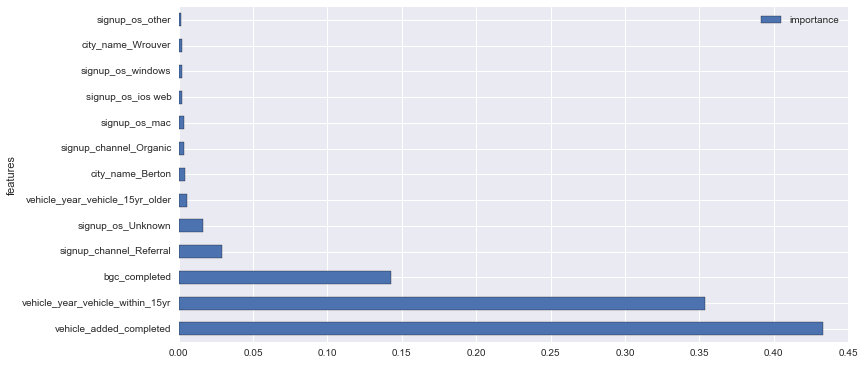

In [39]:
rf, solution, X_test, y_test, oob_score = rf_model(X, y)

Take-away from the plot:
1. Whether vehicle information is uploaded is the strongest predictor of taking the first trip.
2. Vehicles need to be within 15 years old to be eligible for the first trip. 
3. Vehicle passing the background check is more likely to take the first trip.
4. Partners that sign up via referral are more likely to take the first trip. 
5. Other factors include signup system and channel. 

**Step 4: Validation**
* Out-of-bag test error from random forest model
* ROC and AUC
* Precision, recall, confusion matrix

In [40]:
print "The out-of-bag test error is %.2f" % oob_score

The out-of-bag test error is 0.87


In [49]:
def ROC(solution, X_test, y_test):
    y_pred = solution.predict_proba(X_test)
    y_scores = pd.DataFrame(y_pred)[1]
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_scores.ravel())
    auc_score = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, linestyle = ':', linewidth = 4, color = 'navy', \
             label='ROC curve (area = %.4s)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--', lw = 2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend('Receiving Operating Characteristic')
    plt.legend(loc = 'lower right')
    return fpr, tpr, thresholds, auc_score

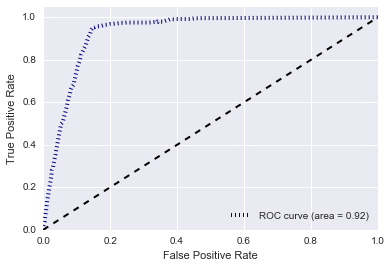

In [50]:
fpr, tpr, thresholds, auc_score = ROC(solution, X_test, y_test)

In [69]:
ROC_summary = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': thresholds})
ROC_summary[(ROC_summary.fpr < 0.2) & (ROC_summary.tpr > 0.9)]

,fpr,threshold,tpr
46,0.134088,0.785222,0.905556
47,0.134774,0.766595,0.908333
48,0.137860,0.753327,0.915278
49,0.138032,0.745735,0.915278
50,0.139746,0.715342,0.920833
51,0.141804,0.705857,0.931944
52,0.141804,0.690501,0.934722
53,0.142833,0.672604,0.938889
54,0.144890,0.658634,0.943056
55,0.144890,0.651216,0.944444


In [63]:
#f1, precision, recall
y_predict = solution.predict(X_test)
f1 = f1_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)

print "f1 score : {}".format(f1)
print "recall: {}".format(recall)
print "precision {}".format(precision)

f1 score : 0.605228178999
recall: 0.948611111111
precision 0.444372153546


In [44]:
def ConfusionMatrix(solution, X_test, y_test):
    y_predict = solution.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    return cm

In [45]:
print "The confusion matrix is "
print ConfusionMatrix(solution, X_test, y_test)

The confusion matrix is 
[[4978  854]
 [  37  683]]


We can clearly see the trade-off between precision and recall. The model does a good job predicting partners that took the first trip (55 false negatives). However, it is at the cost of incorrectly predicting those that didn't take the first trip (1401 false positives). In other words, the model has a low type II error at a cost of a high type I error. This is partially due to that we balanced the minority class with a weight of 12 (by setting class_weight='balanced' in RF model). With a smaller or no weight, we expect to see an increase in precision while a drop in recall. Other potential solutions to overcome the unbalanced label are to gather more data and over-sampling. 

The answer really comes down to which one, i.e. precision and recall, is more substantial in a specific problem. In fraud detection, we'd like a high recall as we don't want to miss any fraud behavior. In this problem, I'd expect a balance between the precision and recall, as we don't want to miss classify either groups.

### Question 3
Briefly discuss how Uber might leverage the insights gained from the model to generate more first trips (again, a few ideas/sentences will suffice).

A few insights can be drawn from the model.
1. Encourage driver partners to upload vehicle information. 
    * Uber can send reminders to partners for an incomplete upload or to starta a new.
2. Make sure potential partners aware of the 15-year-old model limit before signing up so that they can take immediate actions.
    * Uber may highlight this requirement at the signup guidelines. Potential partners with an old car can make an effort to meet the requirement, such as switching to a newer model or renting a car.
3. Encourage partners to complete the background check. 
    * With more time and features, I'd like to explore the background check completion rate and identify the bottleneck in the funnel, such as document completion and etc. With additional insights, Uber can follow up with corresponding actions.
4. Encourage partner referral. 
    * Uber can give partner promotions for successful referral.